In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import sequence, timeseries_dataset_from_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Kiểm tra GPU:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Mục Đích
> Trong phần này chúng ta sẽ đi qua những kiến thức cơ bản và cách dự báo dữ liệu dạng time-series trước khi đi vào thực hành ML, DL, lý do là để chúng ta nắm được các kiến thức cơ bản cũng như hiểu được một số những phương pháp dùng mô hình toán học cơ bản trong time-series. Những phương pháp này có thể dược sử dụng làm baseline để so sánh với cách mô hình ML, DL.

> Các kiến thức trong phần này được thu lượm từ khóa học deeplearning specialization

# Các Loại time-series

## Xu Thế (Trend) và Tính Vụ Mùa (Seasonality)

Tạo hàm vẽ đồ thị:

In [3]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

### Xu Thế

In [5]:
# hàm tạo xu hướng: đơn giản là hàm của thời gian nhân với tỷ lệ slope (tanh):
def get_trend(times, slope=0):
    return times * slope

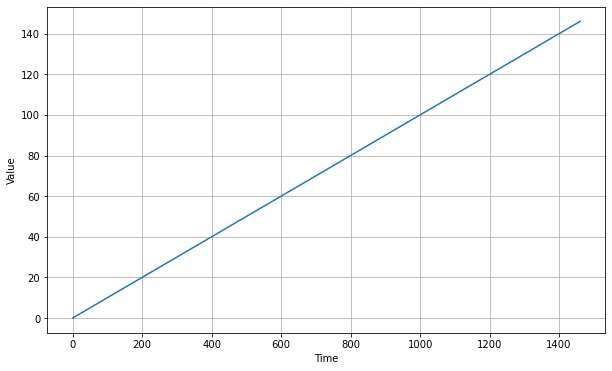

In [9]:
# Tạo time series và vẽ đồ thị giữa thời gian và giá trị:
times = np.arange(4*365 +1) # tạo dữ liệu cho 4 năm
time_series = get_trend(times, .1)
plt.figure(figsize=(10,6))
plot_series(times, time_series)
plt.show()

### Vụ Mùa

In [ ]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)